In [3]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/

import pandas as pd
from numpy import ravel
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

# define dataset
dataset = pd.read_csv('NBA_data_merged.csv')

# get col names to know by index, which feature is which
colNames = list(dataset.columns)
# delete the non stats cols
colToDelete = ['tm', 'player', 'player.id', 'x.min', 'adjusted.production', 'Year', 'Player', 'Pos', 'Team',
               'Selection Type', 'Nationality', 'Selected']
for i in colToDelete:
    colNames.remove(i)

# defines x and y values
X = pd.DataFrame(dataset.loc[:, dataset.columns != 'Selected'])
# remove string columns + duplicated after combination
X = X.drop(columns=['tm', 'player', 'player.id', 'x.min', 'adjusted.production', 'Year', 'Player', 'Pos', 'Team',
                    'Selection Type', 'Nationality'])
#X = X.fillna(X.mean()) #avoid NaN numbers
y = pd.DataFrame(dataset[["Selected"]])

#Scale all cols
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Turning the ndarray back into a pandas df
X = pd.DataFrame(X_scaled, columns= X.columns)

#Use the KNN imputer to fill nan values in the dataset
imputer = KNNImputer(n_neighbors=5, weights= 'distance')

X_imputed = imputer.fit_transform(X)

#Turning the ndarray back into a pandas df
X = pd.DataFrame(X_imputed, columns= X.columns)

In [ ]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/

import pandas as pd
from numpy import ravel
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

# define dataset
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train_smote.csv')

# get col names to know by index, which feature is which
colNames = list(dataset.columns)
# delete the non stats cols
colToDelete = ['tm', 'player', 'player.id', 'x.min', 'adjusted.production', 'Year', 'Player', 'Pos', 'Team',
               'Selection Type', 'Nationality', 'Selected']
for i in colToDelete:
    colNames.remove(i)

# defines x and y values
X = pd.DataFrame(dataset.loc[:, dataset.columns != 'Selected'])
# remove string columns + duplicated after combination
X = X.drop(columns=['tm', 'player', 'player.id', 'x.min', 'adjusted.production', 'Year', 'Player', 'Pos', 'Team',
                    'Selection Type', 'Nationality'])
#X = X.fillna(X.mean()) #avoid NaN numbers
y = pd.DataFrame(dataset[["Selected"]])

#Scale all cols
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\marti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.976931142957008, 0.9748339741349179, 0.9702797202797203]
Feature: year, Score: 0.47990
Feature: age, Score: -0.28060
Feature: g, Score: -0.93235
Feature: mp, Score: -0.00548
Feature: per, Score: 0.95604
Feature: ts., Score: -0.05390
Feature: x3par, Score: -0.07536
Feature: ftr, Score: 0.20073
Feature: orb., Score: 0.04759
Feature: drb., Score: 0.03991
Feature: trb., Score: 0.14061
Feature: ast., Score: 0.26941
Feature: stl., Score: 0.05990
Feature: blk., Score: 0.45357
Feature: tov., Score: 0.33165
Feature: usg., Score: 0.64233
Feature: ows, Score: 0.50420
Feature: dws, Score: 0.52455
Feature: ws, Score: 0.40135
Feature: ws.48, Score: 0.03324
Feature: obpm, Score: 0.02892
Feature: dbpm, Score: 0.28901
Feature: bpm, Score: 0.13254
Feature: ows.48, Score: -0.07059
Feature: dws.48, Score: 0.26463
Feature: shot., Score: 0.48744
Feature: team.mar, Score: -0.03573
Feature: team.mp, Score: -0.23463
Feature: team.gm, Score: -0.10554
Feature: year.3par, Score: 0.17836
Feature: team.ts., Scor

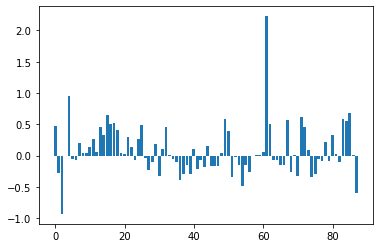

In [2]:
from sklearn.linear_model import LogisticRegression

#this cells runs the model metrics and compute an importance score for each feature
model = LogisticRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.loc[train, :], ravel(y.loc[train, :]))
    #model.fit(X.loc[train, :], y.loc[train, :])
    score = model.score(X.loc[test, :], y.loc[test, :])
    scores.append(score)
print(scores)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (colNames[i], v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


[0.9622509612023767, 0.9615519049283467, 0.9604895104895105]
Feature: year, Score: 0.00000
Feature: age, Score: 0.00081
Feature: g, Score: 0.00000
Feature: mp, Score: 0.00247
Feature: per, Score: 0.07737
Feature: ts., Score: 0.00000
Feature: x3par, Score: 0.00347
Feature: ftr, Score: 0.01053
Feature: orb., Score: 0.00911
Feature: drb., Score: 0.00000
Feature: trb., Score: 0.00402
Feature: ast., Score: 0.00437
Feature: stl., Score: 0.01010
Feature: blk., Score: 0.00823
Feature: tov., Score: 0.00247
Feature: usg., Score: 0.05738
Feature: ows, Score: 0.00912
Feature: dws, Score: 0.00209
Feature: ws, Score: 0.00169
Feature: ws.48, Score: 0.00000
Feature: obpm, Score: 0.00000
Feature: dbpm, Score: 0.00000
Feature: bpm, Score: 0.00247
Feature: ows.48, Score: 0.00598
Feature: dws.48, Score: 0.00000
Feature: shot., Score: 0.01857
Feature: team.mar, Score: 0.02656
Feature: team.mp, Score: 0.00000
Feature: team.gm, Score: 0.00000
Feature: year.3par, Score: 0.01617
Feature: team.ts., Score: 0.000

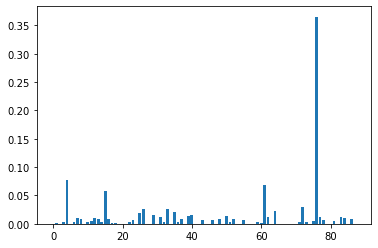

In [4]:
from sklearn.tree import DecisionTreeClassifier

#this cells runs the model metrics and compute an importance score for each feature
model = DecisionTreeClassifier()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.loc[train, :], ravel(y.loc[train, :]))
    #model.fit(X.loc[train, :], y.loc[train, :])
    score = model.score(X.loc[test, :], y.loc[test, :])
    scores.append(score)
print(scores)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (colNames[i], v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[0.9744844459979028, 0.9744844459979028, 0.9678321678321679]
Feature: year, Score: 0.00741
Feature: age, Score: 0.00602
Feature: g, Score: 0.00437
Feature: mp, Score: 0.00597
Feature: per, Score: 0.04670
Feature: ts., Score: 0.00572
Feature: x3par, Score: 0.00781
Feature: ftr, Score: 0.00660
Feature: orb., Score: 0.00617
Feature: drb., Score: 0.00827
Feature: trb., Score: 0.00636
Feature: ast., Score: 0.00768
Feature: stl., Score: 0.00628
Feature: blk., Score: 0.00514
Feature: tov., Score: 0.00791
Feature: usg., Score: 0.03671
Feature: ows, Score: 0.01867
Feature: dws, Score: 0.00970
Feature: ws, Score: 0.04803
Feature: ws.48, Score: 0.00715
Feature: obpm, Score: 0.00660
Feature: dbpm, Score: 0.00323
Feature: bpm, Score: 0.00700
Feature: ows.48, Score: 0.00808
Feature: dws.48, Score: 0.00620
Feature: shot., Score: 0.03351
Feature: team.mar, Score: 0.00735
Feature: team.mp, Score: 0.00519
Feature: team.gm, Score: 0.00058
Feature: year.3par, Score: 0.00706
Feature: team.ts., Score: 0.007

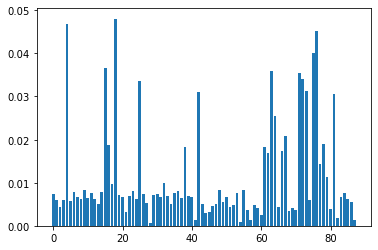

In [5]:
from sklearn.ensemble import RandomForestClassifier

#this cells runs the model metrics and compute an importance score for each feature
model = RandomForestClassifier()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.loc[train, :], ravel(y.loc[train, :]))
    #model.fit(X.loc[train, :], y.loc[train, :])
    score = model.score(X.loc[test, :], y.loc[test, :])
    scores.append(score)
print(scores)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (colNames[i], v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

#this cells runs the model metrics and compute an importance score for each feature
model = KNeighborsClassifier()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.loc[train, :], ravel(y.loc[train, :]))
    #model.fit(X.loc[train, :], y.loc[train, :])
    score = model.score(X.loc[test, :], y.loc[test, :])
    scores.append(score)
print(scores)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance = results.importances_mean

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (colNames[i], v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


[0.9674938832576022, 0.9678434113946173, 0.9653846153846154]


KeyboardInterrupt: 